In [1]:
%matplotlib notebook

In [20]:
import matplotlib
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# matplotlib.use("TkAgg")

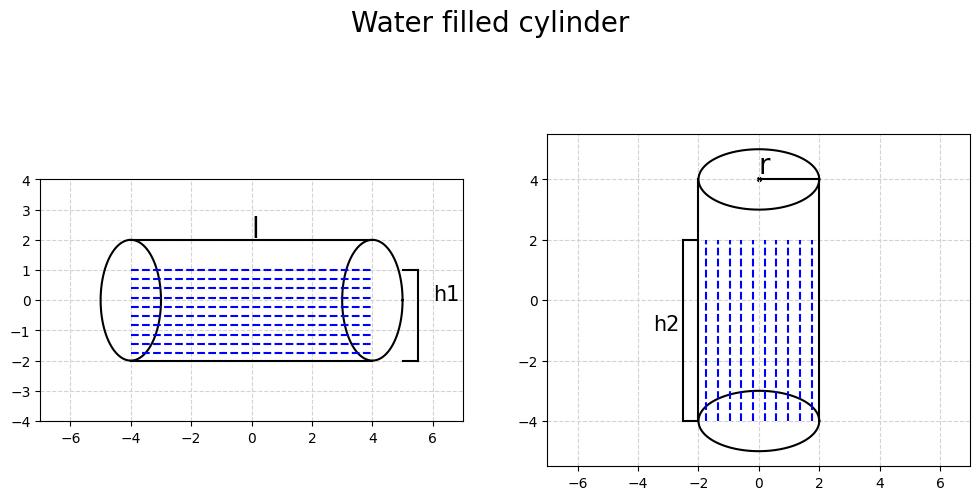

In [2]:
def ellipse(x_pos,y_pos, x_rad,y_rad):
  t = np.linspace(0, 2*np.pi, 100)
  plt.plot( x_pos+x_rad*np.cos(t) , y_pos+y_rad*np.sin(t) , color='black')  


fig, axs = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('Water filled cylinder', fontsize=20)

plt.axes(axs[0])
plt.gca().set_aspect('equal')
ellipse(-4,0,1,2)
ellipse(4,0,1,2)

plt.plot([-4,4],[2,2], color='black')
plt.plot([-4,4],[-2,-2], color='black')
plt.text(0,2.1, 'l', fontsize=20)

plt.plot([5,5.5], [1,1], c='k')
plt.plot([5,5.5], [-2,-2], c='k')
plt.plot([5.5,5.5], [1,-2], c='k')
plt.text(6,0, 'h1', fontsize=15)
plt.gca().set_xlim(-7,7)
plt.gca().set_ylim(-4,4)

for i in np.linspace(-1.75,1,10):
  plt.plot([-4,4],[i,i], color='blue', ls='--')
plt.grid(color='lightgray',linestyle='--')

plt.axes(axs[1])
plt.gca().set_aspect('equal')
ellipse(0,-4,2,1)
ellipse(0,4,2,1)

plt.plot([2,2],[-4,4], color='black')
plt.plot([-2,-2],[-4,4], color='black')
plt.plot([0,2],[4,4], color='black')
plt.scatter(0,4, color='black', s=8)
plt.text(0,4.2, 'r', fontsize=20)

plt.plot([-2.5,-2], [2,2], c='k')
plt.plot([-2.5,-2], [-4,-4], c='k')
plt.plot([-2.5,-2.5], [2,-4], c='k')
plt.text(-3.5,-1, 'h2', fontsize=15)
plt.gca().set_xlim(-4,4)
plt.gca().set_xlim(-7,7)

for i in np.linspace(-1.75,1.75,10):
  plt.plot([i,i],[-4,2], color='blue', ls='--')
plt.grid(color='lightgray',linestyle='--')

plt.show()

# Volume of water filled cylinder

Consider a cylinder of length 'l' and radius 'r'.

\
Case 1: Horizontal cylinder \
https://mathworld.wolfram.com/HorizontalCylindricalSegment.html \

- filled with water upto height h1
- area $ A = r^{2} \cos^{-1}\left ( \frac{r-h_{1}}{r} \right ) - (r-h_{1}) \sqrt{2rh_{1} - h_{1}^{2}} $
- volume $ V =  l \times A = l \times \left ( r^{2} \cos^{-1}\left ( \frac{r-h_{1}}{r} \right ) - (r-h_{1}) \sqrt{2rh_{1} - h_{1}^{2}} \right )  $

Case 2: Vertical cylinder
- filled with water upto height h2
- area $ A = \pi r^{2} $
- volume $ V = h_{2} \times A = h_{2} \times \pi r^{2} $

---
\
The volume in both cylinders would be equal since its the same cylinder kept in different position.

\
$ l \times \left ( r^{2} \cos^{-1}\left ( \frac{r-h_{1}}{r} \right ) - (r-h_{1}) \sqrt{2rh_{1} - h_{1}^{2}} \right ) = h_{2} \times \pi r^{2} $

\
Let $h_{1}$ be expressed as a multiple of $2r$.
- $h_{1}$ = $2rx$
- $x \in [0,1] $

And let $h_{2}$ be expressed as a multiple of $l$.
- $h_{2}$ = $ly$
- $y \in [0,1] $

\
Substituting $h_{1}$ by $2rx$ and $h_{2}$ by $ly$, \
$ l \times \left ( r^{2} \cos^{-1}\left ( \frac{r-2rx}{r} \right ) - (r-2rx) \sqrt{2r(2rx) - (2rx)^{2}} \right ) = ly \times \pi r^{2} $

$ r^{2} \cos^{-1} ( 1 - 2x ) - (r-2rx) \sqrt{4 r^2 x - 4 r^2 x^2} = y \times \pi r^{2} $

$ r^{2} \cos^{-1} ( 1 - 2x ) - r(1-2x) (2r) \sqrt{x - x^2} = y \times \pi r^{2} $

$ r^{2} \cos^{-1} ( 1 - 2x ) - (2r^2)(1-2x) \sqrt{x - x^2} = y \times \pi r^{2} $

$ r^{2} ( \cos^{-1} ( 1 - 2x ) - 2(1-2x) \sqrt{x - x^2} ) = y \times \pi r^{2} $

Hence,
$$ y = \frac{\cos^{-1} ( 1 - 2x ) - 2(1-2x) \sqrt{x - x^2} ) }{\pi} $$

---
\
So if the height of water when viewed from the side of a horizontal cylinder is scaled by a factor of 'x'.

Then the height of water when viewed from the side of the same cylinder in vertical position would be scaled by a factor of $\frac{\cos^{-1} ( 1 - 2x ) - 2(1-2x) \sqrt{x - x^2} ) }{\pi}$

Maximum difference between $h_{1}$ and $h_{2}$ occurs when $x = \frac{1}{2} \pm \frac{\sqrt{4^{2}-\pi^{2}}}{8} \approx (0.19, 0.81)$

In [3]:
def find_vertical_scaling(x):
  a = 1 - 2*x
  return ( np.arccos(a) - 2*a*np.sqrt(x-x**2) ) / np.pi

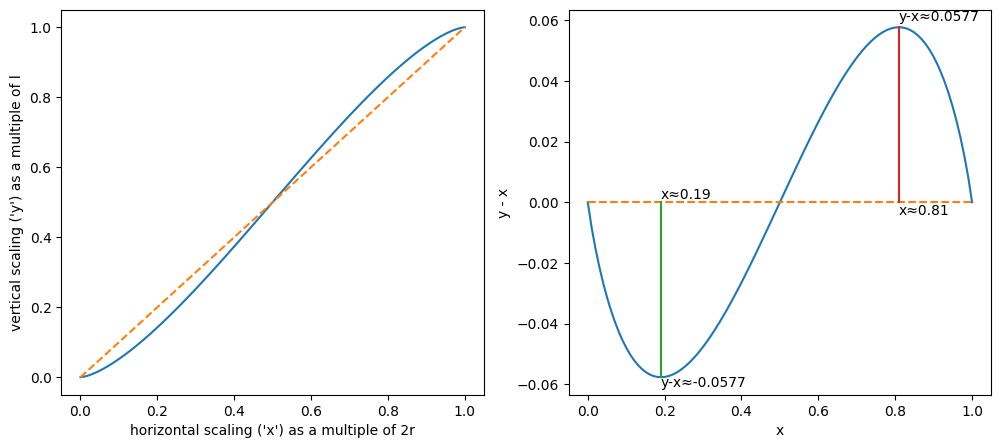

In [4]:
# plot of the function representing vertical scaling

fig, axs = plt.subplots(1,2, figsize=(12,5))

x = np.linspace(0,1,100)
y = find_vertical_scaling(x)

plt.axes(axs[0])
plt.plot(x, y)
plt.plot(x,x, ls='--')
plt.xlabel("horizontal scaling ('x') as a multiple of 2r")
plt.ylabel("vertical scaling ('y') as a multiple of l")

plt.axes(axs[1])
plt.plot(x,y-x)
plt.plot(x,[0]*len(x), ls='--')
d = np.sqrt(4**2 - np.pi**2) / 8
x1, x2 = 0.5 - d, 0.5 + d
y1 = find_vertical_scaling(x1)
y2 = find_vertical_scaling(x2)
plt.plot([x1,x1],[0,y1-x1])
plt.plot([x2,x2],[0,y2-x2])
plt.text(x1,0.001, f'x≈{x1:.2}')
plt.text(x1,y1-x1-0.003, f'y-x≈{y1-x1:.3}')
plt.text(x2,-0.004, f'x≈{x2:.2}')
plt.text(x2,y2-x2+0.002, f'y-x≈{y2-x2:.3}')
plt.xlabel("x")
plt.ylabel("y - x")

plt.show()

# Visualization using slider

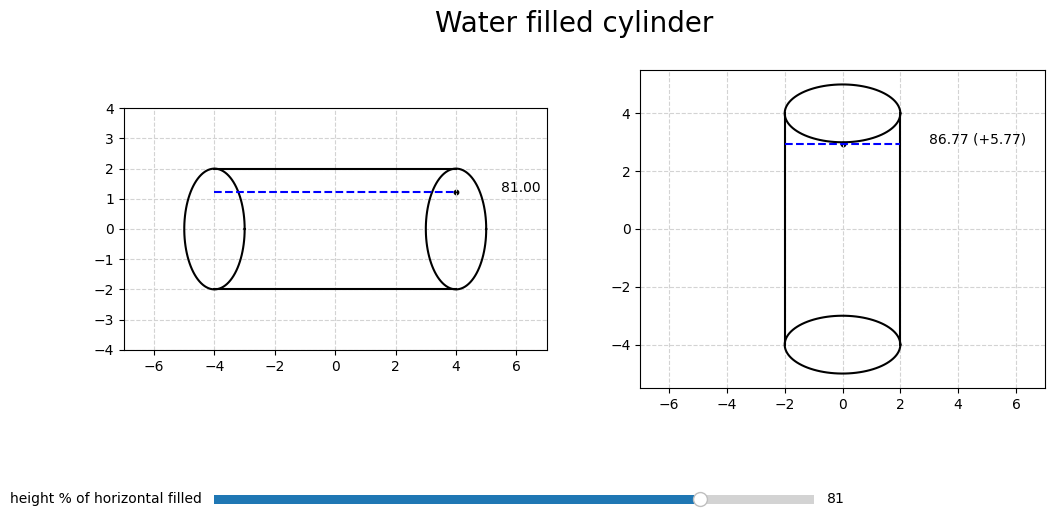

In [5]:
from matplotlib.widgets import Slider

fig, axs = plt.subplots(1,2, figsize=(12,6))
plt.subplots_adjust(bottom=0.35)
fig.suptitle('Water filled cylinder', fontsize=20)

ax_filled = plt.axes([0.2, 0.15, 0.5, 0.03])
h_filled = Slider(ax_filled, 'height % of horizontal filled', 0.0, 100.0, 81)

plt.axes(axs[0])
plt.gca().set_aspect('equal')
ellipse(-4,0,1,2)
ellipse(4,0,1,2)

plt.plot([-4,4],[2,2], color='black')
plt.plot([-4,4],[-2,-2], color='black')
l1, = plt.plot([-4,4],[0,0], color='blue', ls='--')
scat1 = plt.scatter(4,0, color='black', s=10)
text1 = plt.text(5.5,0, '50')


plt.gca().set_xlim(-7,7)
plt.gca().set_ylim(-4,4)
plt.grid(color='lightgray',linestyle='--')

plt.axes(axs[1])
plt.gca().set_aspect('equal')
ellipse(0,-4,2,1)
ellipse(0,4,2,1)

plt.plot([2,2],[-4,4], color='black')
plt.plot([-2,-2],[-4,4], color='black')
l2, = plt.plot([-2,2],[0,0], color='blue', ls='--')
scat2 = plt.scatter(0,0, color='black', s=10)
text2 = plt.text(3,0, '50')

plt.gca().set_xlim(-4,4)
plt.gca().set_xlim(-7,7)
plt.grid(color='lightgray',linestyle='--')

def update(val):
    x = val / 100 # [0,100] -> [0,1]
    y = find_vertical_scaling(x)
    
    h1 = 4*x -2 # [0,1] -> [-2,2]
    l1.set_ydata([h1,h1])
    scat1.set_offsets([4,h1])
    text1.set_y(h1)
    text1.set_text(f'{100*x:.2f}')
    
    h2 = 8*y -4 # [0,1] -> [-2,2]
    l2.set_ydata([h2,h2])
    scat2.set_offsets([0,h2])
    text2.set_y(h2)
    if x==y:
      text2.set_text(f'{100*y:.2f}')
    elif x>y:
      text2.set_text(f'{100*y:.2f} (-{100*(y-x):.2f})')
    else:
      text2.set_text(f'{100*y:.2f} (+{100*(y-x):.2f})')  
    
# Call update function when slider value is changed
update(h_filled.val)
h_filled.on_changed(update)

plt.show()

# Inverse of the problem

What if we know the scaling factor of the vertical cylinder 'x' and we want to find the scaling factor of the same cylinder in horizontal position 'y'.


From the above derivations we know that

$$ y = \frac{\cos^{-1} ( 1 - 2x ) - 2(1-2x) \sqrt{x - x^2} ) }{\pi} $$

\
Here we want to make x as the subject of the equation such that $x = g(y)$ \
but this is not possible since this is a transcendental equation.


However it can be solved using numerical approximation methods like Newton's method and Lagrange inversion :  


1. [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)

 In order to find $x$ such that $f(x) = y$, we can find roots of the equation $f(x) - y = 0$

 $$ x_{n+1} = x_{n} - \frac {f(x_{n}) - y}{{f}'(x_{n})} $$

 $$ x_{n+1} = x_{n} - \frac {\frac{\cos^{-1} ( 1 - 2x_{n} ) - 2(1-2x_{n}) \sqrt{x_{n} - x_{n}^2} ) }{\pi} - y}{\frac{8\sqrt{x_{n}-x_{n}^{2}}}{\pi}} $$

 $$ x_{n+1} = x_{n} - \frac {\cos^{-1} ( 1 - 2x_{n} ) - 2(1-2x_{n}) \sqrt{x_{n} - x_{n}^2} ) - \pi y}{8\sqrt{x_{n}-x_{n}^{2}}} $$
 <br>
 <br>

2. [Lagrange inversion](https://en.wikipedia.org/wiki/Lagrange_inversion_theorem)

 If we have a function $y=f(x)$ and we want to approximate its inverse $x=g(y)$ around a point $c$ then

 $$ g(y) = c + \sum\limits_{n=1}^{\infty} g_{n} \frac{(y-f(c))^{n}}{n!} $$
 where
 $$ g_{n} = \lim_{x \rightarrow c} \frac{\mathrm{d^{n-1}} }{\mathrm{d} x^{n-1}} \left [ \left ( \frac{x-c}{f(x)-f(c)} \right ) ^{n} \right ] $$

 \
 Let's have an approximation around $c=\frac{1}{2}$ as the domain of our function is 0 to 1.
 $$ f\left(\frac{1}{2}\right) = \frac{\cos^{-1}(0)}{\pi} = \frac{1}{2} $$

 <br>
 
 $$ g(y) = \frac{1}{2}
 +\frac{(y-\frac{1}{2})^{1}}{1!}\left(\frac{\pi}{4}\right)
 +\frac{(y-\frac{1}{2})^{2}}{2!}(0)
 +\frac{(y-\frac{1}{2})^{3}}{3!}\left(\frac{\pi^{3}}{16}\right)
 +\frac{(y-\frac{1}{2})^{4}}{4!}(0)
 +\frac{(y-\frac{1}{2})^{5}}{5!}\left(\frac{13\pi^{5}}{64}\right)
 +\cdots $$

 It seems that the odd derivatives are becoming 0.

 $$ g(y) = \frac{1}{2}
 +\frac{\pi}{4}\left(y-\frac{1}{2}\right)
 +\frac{\pi^{3}}{3!\cdot16}\left(y-\frac{1}{2}\right)^{3}
 +\frac{13\pi^{5}}{5!\cdot64}\left(y-\frac{1}{2}\right)^{5}
 +\frac{493\pi^{7}}{7!\cdot256}\left(y-\frac{1}{2}\right)^{7}
 +\frac{37369\pi^{9}}{9!\cdot1024}\left(y-\frac{1}{2}\right)^{9}
 +\cdots $$
 
 $$ g(y) = \frac{1}{2}
 +\frac{\pi}{2^{2}}\left(y-\frac{1}{2}\right)
 +\frac{\pi^{3}}{3!\cdot 2^{4}}\left(y-\frac{1}{2}\right)^{3}
 +\frac{13\pi^{5}}{5!\cdot 2^{6}}\left(y-\frac{1}{2}\right)^{5}
 +\frac{493\pi^{7}}{7!\cdot 2^{8}}\left(y-\frac{1}{2}\right)^{7}
 +\frac{37369\pi^{9}}{9!\cdot 2^{10}}\left(y-\frac{1}{2}\right)^{9}
 +\cdots $$

<br>

 $$ g(y) = \frac{1}{2} + \sum_{n=1}^{\infty} \frac{C(n)\cdot \pi^{2n-1}}{(2n-1)! \cdot 2^{2n}}
\left(y-\frac{1}{2}\right)^{2n-1} $$
where exponential generating function [$C(x)$](https://oeis.org/A281181) satisfies: \
$ C(x) = \cosh\left(\int C(x)^3 {\mathrm{d} x}\right) $

In [17]:
def evaluate(x, y):
  err = y - x
  err = abs(err)
  errs = {}
  errs['maximum error'] = err.max()
  errs['mean absolute error'] = err.mean()
  errs['mean squared error'] = (err**2).mean()
  return errs

## Newton's method

In [77]:
def deriv(x):
  return (8/np.pi) * np.sqrt(x-x**2)

# approximated inverse using Newton's method
def find_horizontal_scaling(y, x0, iters=5):
  x = x0
  for _ in range(iters):
    x = x - (find_vertical_scaling(x) - y) / deriv(x)
  return x

x = np.linspace(0,1,100)
y = find_vertical_scaling(x)
xp = find_horizontal_scaling(y, 0.5)
evaluate(x, xp)

{'maximum error': 0.0012368680834583534,
 'mean absolute error': 2.4863757571037276e-05,
 'mean squared error': 3.05976268868167e-08}

  0%|          | 0/5 [00:00<?, ?it/s]

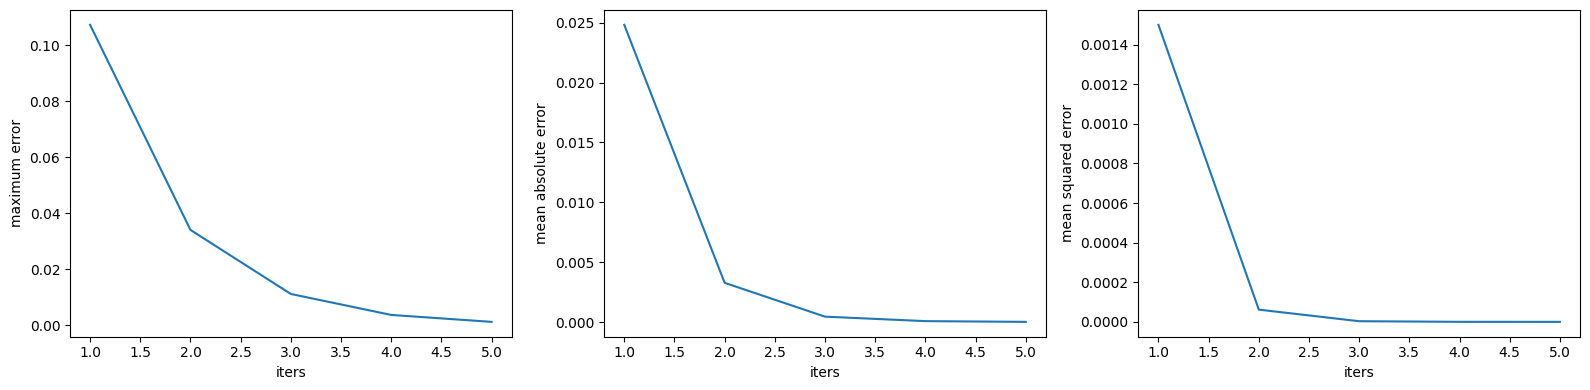

In [79]:
iters, errs = [], []
x = np.linspace(0,1,100)
y = find_vertical_scaling(x)

for i in tqdm(range(1,6)):
  xp = find_horizontal_scaling(y, 0.5, iters=i)
  iters.append(i)
  errs.append(evaluate(x, xp))
  
errs = {k: [dic[k] for dic in errs] for k in errs[0]}
fig, axs = plt.subplots(1, 3, figsize=(16,4))

for i, (err_type, err_vals) in enumerate(errs.items()):
  plt.axes(axs[i])
  plt.plot(iters, err_vals)
  plt.xlabel('iters')
  plt.ylabel(err_type)

plt.tight_layout()
plt.show()

## Lagrange inversion using [series reversion](https://mathworld.wolfram.com/SeriesReversion.html)

### Manually define the series coeffs

In [62]:
coeffs = [np.pi/4,
          (np.pi**3)/(np.math.factorial(3)*16),
          (13*(np.pi**5))/(np.math.factorial(5)*64),
          (493*(np.pi**7))/(np.math.factorial(7)*256),
          (37369*(np.pi**9))/(np.math.factorial(9)*1024),
         ]
print(coeffs)

# approximated inverse using Lagrange inversion
def find_horizontal_scaling(y, coeffs=coeffs):
  x = 0.5
  for n, coeff in enumerate(coeffs):
    x += coeff * ((y-0.5)**(1+2*n))
  return x

[0.7853981633974483, 0.3229820487531231, 0.5180020706000857, 1.1540523943560563, 2.9977633171594236]


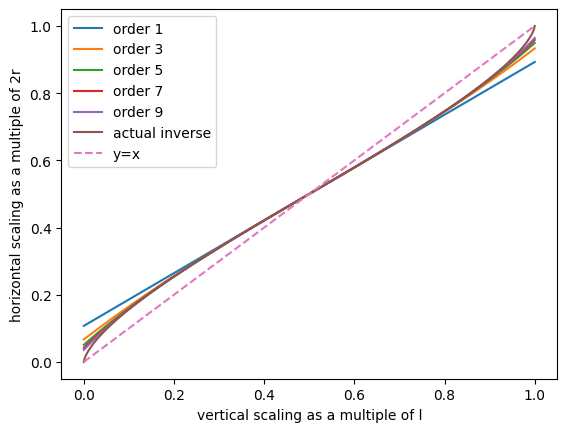

In [63]:
x = np.linspace(0,1,100)
y = find_vertical_scaling(x)
xp = find_horizontal_scaling(y)
evaluate(x, xp)


# plot of the function representing vertical scaling

for i in range(1,len(coeffs)+1):
  plt.plot(y, find_horizontal_scaling(y, coeffs[:i]), label=f'order {2*i-1}')

plt.plot(y, x, label='actual inverse')
plt.plot(x,x, ls='--', label='y=x')
plt.xlabel('vertical scaling as a multiple of l')
plt.ylabel('horizontal scaling as a multiple of 2r')
plt.legend()
plt.show()

### Use bell polynomials to compute coeffs

https://math.stackexchange.com/questions/3693157/numerical-algorithm-for-finding-the-inverse-of-a-function

https://mathematica.stackexchange.com/questions/166103/how-can-i-produce-lagrange-inversion-coefficients

https://mathematica.stackexchange.com/questions/188399/on-the-n-th-derivative-of-the-inverse-function

In [64]:
import sympy as sp

In [65]:
def g(n):
  f1 = sp.Symbol('f1')
  if n == 1:
    gn = 1/f1

  elif n >= 2:
    bell_sum = 0
    fc_vars = sp.symbols(f'fc:{n}')

    for k in range(1,n):
      bell_poly = sp.bell(n-1, k, fc_vars[1:n-k+1])
      bell_sum += ((-1)**k) * (sp.rf(n,k)) * bell_poly

    bell_sum /= f1**n
    gn = bell_sum
  
  for i in range(1,n):
    gn = gn.subs(f'fc{i}', f'f{i+1}/(({i}+1)*f1)')
  
  return gn

In [66]:
from IPython.display import display

for i in range(1,6):
  display(g(i).simplify())

1/f1

-f2/f1**3

(-f1*f3 + 3*f2**2)/f1**5

(-f1**2*f4 + 10*f1*f2*f3 - 15*f2**3)/f1**7

(-f1**3*f5 + f1**2*(15*f2*f4 + 10*f3**2) - 105*f1*f2**2*f3 + 105*f2**4)/f1**9

In [67]:
# finds inverse series of function y = f(x) around point c
def inverse_series(func_expr, c=0, order=4):
  n = order + 1
  x, y = sp.symbols('x, y')
  inv_series = c

  df = []
  f = func_expr
  for _ in range(n):
    df.append(f.subs(x, c))
    f = f.diff()

  for k in range(1,n):
    
    # slower method to compute gk using (k-1)th derivative of kth power
#     gk = ((x-c) / (func_expr - func_expr.subs(x, c))) ** k
#     gk = gk.diff(x,k-1)
#     gk = gk.limit(x,c)
    
    # faster method to compute gk using bell polynomials
    gk = g(k)
    for i in range(1,n):  gk = gk.subs(f'f{i}', df[i])

    term = sp.Mul(gk , ((y - func_expr.subs(x,c))**k) / sp.factorial(k), evaluate=False)
    if term.doit() != 0:
      inv_series += sp.UnevaluatedExpr(term)

  return inv_series

In [68]:
x, y = sp.symbols('x, y')
a = 1 - 2*x
find_vertical_scaling = ( sp.acos(a) - 2*a*sp.sqrt(x-x**2) ) / sp.pi

inv_series = inverse_series(find_vertical_scaling, sp.Rational(1/2), 11)
inv_series

1/2 + (pi/4)*(y - 1/2) + (pi**3/16)*((y - 1/2)**3/6) + (13*pi**5/64)*((y - 1/2)**5/120) + (493*pi**7/256)*((y - 1/2)**7/5040) + (37369*pi**9/1024)*((y - 1/2)**9/362880) + (4732249*pi**11/4096)*((y - 1/2)**11/39916800)

In [69]:
find_horizontal_scaling = sp.lambdify(sp.Symbol('y'), inv_series)
find_vertical_scaling = sp.lambdify(sp.Symbol('x'), find_vertical_scaling)

In [70]:
x = np.linspace(0,1,100)
y = find_vertical_scaling(x)
xp = find_horizontal_scaling(y)
evaluate(x, xp)

{'maximum error': 0.03171168991844667,
 'mean absolute error': 0.002704528670260678,
 'mean squared error': 4.9193258610455575e-05}

  0%|          | 0/6 [00:00<?, ?it/s]

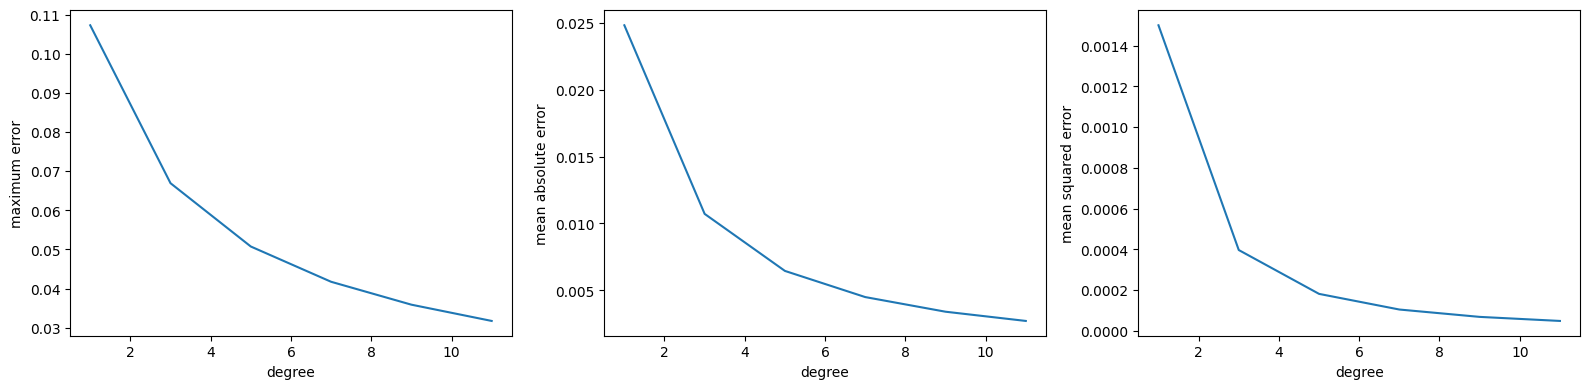

In [60]:
indxs, errs = [], []
for i in tqdm(range(1,12,2)):
  x, y = sp.symbols('x, y')
  a = 1 - 2*x
  find_vertical_scaling = ( sp.acos(a) - 2*a*sp.sqrt(x-x**2) ) / sp.pi
  inv_series = inverse_series(find_vertical_scaling, sp.Rational(1/2), i)

  find_horizontal_scaling = sp.lambdify(sp.Symbol('y'), inv_series)
  find_vertical_scaling = sp.lambdify(sp.Symbol('x'), find_vertical_scaling)

  x = np.linspace(0,1,100)
  y = find_vertical_scaling(x)
  xp = find_horizontal_scaling(y)
  indxs.append(i)
  errs.append(evaluate(x, xp))


errs = {k: [dic[k] for dic in errs] for k in errs[0]}
fig, axs = plt.subplots(1, 3, figsize=(16,4))

for i, (err_type, err_vals) in enumerate(errs.items()):
  plt.axes(axs[i])
  plt.plot(indxs, err_vals)
  plt.xlabel('degree')
  plt.ylabel(err_type)

plt.tight_layout()
plt.show()